matplotlib.pyplot.boxplot

# Box Plots and Their Uses

The box plot is common in data analysis for investigating individual numerical variables.
In this project, you will investigate and explain box plots and their uses. The boxplot
function from the Python package matplotlib.pyplot can be used to create box plots.
Your submission should be in the form of a repository containing a Jupyter notebook in
which you detail your findings. In your notebook, you should:
1. Summarise the history of the box plot and situations in which it used.
2. Demonstrate the use of the box plot using data of your choosing.
3. Explain any relevant terminology such as the terms quartile and percentile.
4. Compare the box plot to alternatives.

# 1. History of the Box Plot and Situations in which it used

# 2. Uses of the Box Plot Using the Iris Data Set

In [1]:
# Import numpy as np
import numpy as np

# Import pandas
import pandas as pd

# import seaborn 
import seaborn as sns
from scipy.optimize import curve_fit

# import matplot
import matplotlib.pyplot as plt

In [2]:
# Load the iris data set from a URL.
df = pd.read_csv("https://gist.github.com/ericbusboom/b2ac1d366c005cd2ed8c/raw/c92c66e43d144fa9c29dbd602d5af6988e8db533/anscombes.csv")

In [3]:
df

,id,dataset,x,y
0,0,I,10.0,8.04
1,1,I,8.0,6.95
2,2,I,13.0,7.58
3,3,I,9.0,8.81
4,4,I,11.0,8.33
5,5,I,14.0,9.96
6,6,I,6.0,7.24
7,7,I,4.0,4.26
8,8,I,12.0,10.84
9,9,I,7.0,4.82


Plot X versus Y for the 4no. types of datasets. 
Also plot the linear regression for each dataset to make conclusions on the line of best fit versus the actual figures of the dataset

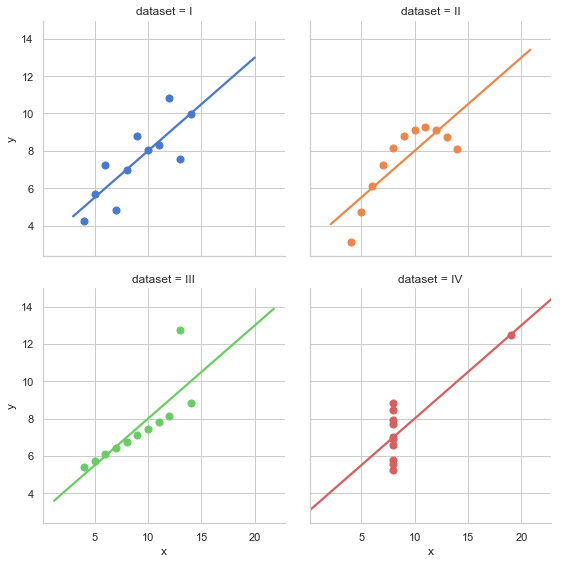

In [4]:
# The data set can also be loaded directly Load the example dataset for Anscombe's quartet for seaborn
df = sns.load_dataset("anscombe")

sns.set(style="whitegrid")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})
plt.show()

The dataset can also be loaded directly into Seaborn. Below are adjusted graphics / alternative representation of the datasets. 

<Figure size 432x288 with 0 Axes>

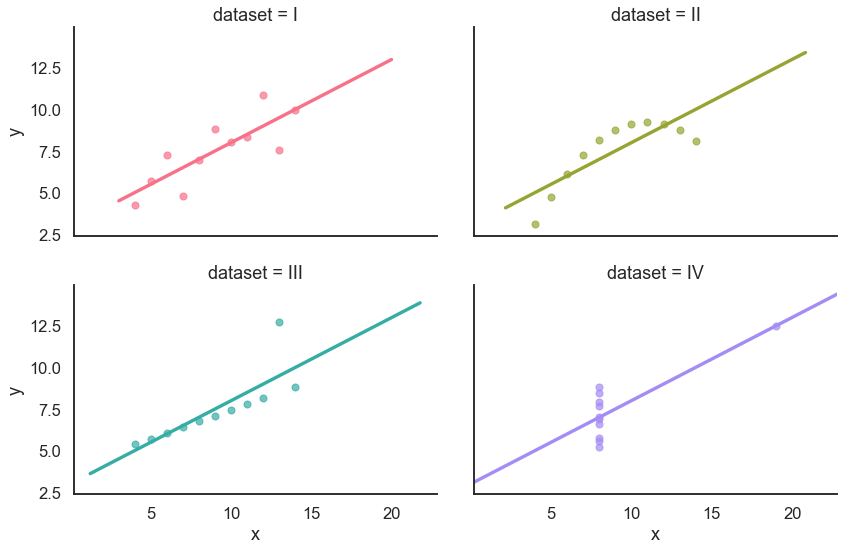

In [5]:
# Seaborn conveniently provides the data for Anscombe's quartet.
df = sns.load_dataset("anscombe")
dset = df.dataset.unique()

# Computing basic stats and linear regression all groups.
for data in dset:
    tmp = df.loc[df.dataset == data]


# Setting up params for graphic
sns.set(style="white")
sns.set_context("talk")
sns.despine(left=True)

# Plotting
catcher = sns.lmplot("x", "y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="husl", height=4,
           scatter_kws={"s": 50, "alpha": 0.7}, aspect=1.5)

sns.despine()

# Saving graphic
plt.savefig('quartet.png')

### Examining the 4 Datasets

- Dataset 1: appears to be a simple linear relationship, corresponding to two variables correlated and following the assumption of normality.
- Dataset 2 is not distributed normally; while a relationship between the two variables is obvious, it is not linear. 
- Dataset 3: the distribution is linear, but should have a different regression line. An outlier has changed what would have been the correlation coefficient. 
- Dataset 4: shows an example when one outlier is enough to produce a high correlation coefficient, even though there appears to be a constant x values with varying y values for most values. 

# 3. Descriptive Statistics of the Variables in the Dataset

In [6]:
# describe what is going on across all datasets for x and y
df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [7]:
# describe what is going on in each dataset for x and y
df.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

Each dataset has the same mean, median, standard deviation, and correlation coefficient between x and y.

# 4. Why the Dataset is Interesting

The descriptive statistics of the variables in the dataset show that for any one of the four given datasets: 
- The x and y values as well as the models appear to be identical
- The mean of all x values is 9 
- The standard deviation of all x values is 3.316625
- The mean of all y values is 7.5
- The standard deviation of all y values is 2.03. 
- The correlation between x and y in all four pairs is 0.816 and the linaer regression equations are all y = 3 + 0.5x.

This would suggest that the sets are similar, however, when we examine the plots (as described in Section 2), we can see that the four plots of x and y are very different. 

Anscombe’s Quartet shows:
- The importance of data visualisation in data analysis. Without data visualization, statistics alone could be misleading. 
- How data visualisation can help up make initial judgements on relationships between variables before conducting statistic calculations
- The effect of outliers on statistical properties

Ancombe felt that a computer should make both calculations and graphs. Both sorts of output should be studied; each will contribute to understanding.
 
![trex joke](https://2.bp.blogspot.com/-oCs3ZH8h1HE/Wkqh9H_39oI/AAAAAAAAd88/TfalMCzPn-Q7rW_ZNsLfWaEsPC-X_QXJgCLcBGAs/s1600/trex.JPG)


# References 

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html
***
https://en.wikipedia.org/wiki/Box_plot
***

***

***

# End